# General tests of te AIS

Created on Tue Nov 22 16h24m,  2022

This is a script for the development of general tests

@author: denis


In [ ]:
# Test the sbpy package
from sbpy.calib import Vega, vega_fluxd

print(vega_fluxd.get()["Johnson V"])

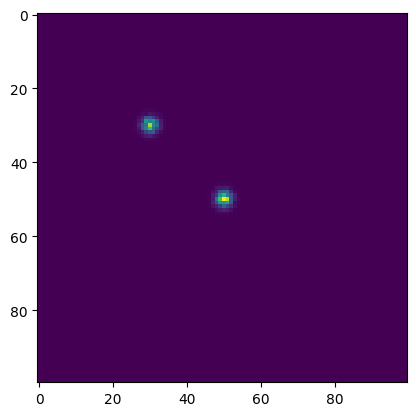

In [1]:
# Test the PSF class
import matplotlib.pyplot as plt

from AIS.Point_Spread_Function import Point_Spread_Function

ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 100,
}
psf = Point_Spread_Function(ccd_operation_mode, 1)
image = psf.create_star_image((50, 50), 1e3, 1e3)
plt.imshow(image)
plt.show()

In [ ]:
# Test the AIS.create_image function
import os

from AIS.Artificial_Image_Simulator import Artificial_Image_Simulator

ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 100,
}

wavelength_interval = (400, 1100, 100)
ais = Artificial_Image_Simulator(ccd_operation_mode, 1, -70)
ais.create_source_sed("blackbody", 15, wavelength_interval, 5700)
ais.create_sky_sed("new")
ais.apply_atmosphere_spectral_response(air_mass=1.2, sky_condition="photometric")
ais.apply_telescope_spectral_response()
ais.apply_sparc4_spectral_response("photometry")
ais.create_artificial_image(os.path.join("E:", "images", "test"))

In [ ]:
# Create a time series of images

import os
from math import pi
from sys import exit
from time import sleep

import matplotlib.pyplot as plt
import numpy as np

from AIS.Artificial_Image_Simulator import Artificial_Image_Simulator

ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 100,
}

n = 100
images_path = os.path.join("E:", "images", "test")
time = np.linspace(0, 2 * pi, n)
mags = 15 + 0.1 * np.sin(time) + np.random.normal(0, 0.01, n)

ais = Artificial_Image_Simulator(ccd_operation_mode, channel_id=1, ccd_temperature=-70)
ais.create_bias_image(images_path, 10)
ais.create_flat_image(images_path, 20)


for mag in mags:
    ais = Artificial_Image_Simulator(
        ccd_operation_mode, channel_id=1, ccd_temperature=-70
    )
    ais.create_source_sed(
        calculation_method="blackbody",
        magnitude=mag,
        wavelength_interval=(400, 1100, 1000),
        temperature=5700,
    )
    ais.create_sky_sed(moon_phase="new")
    ais.apply_atmosphere_spectral_response()
    ais.apply_telescope_spectral_response()
    ais.apply_sparc4_spectral_response(acquisition_mode="photometry")
    ais.create_artificial_image(image_path=images_path, star_coordinates=(50, 50))
    sleep(ccd_operation_mode["t_exp"])

In [ ]:
# Create video polarimetry

import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

from AIS.Artificial_Image_Simulator import Artificial_Image_Simulator

ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 100,
}
path = r"E:\images\test"

ais = Artificial_Image_Simulator(ccd_operation_mode, channel_id=1, ccd_temperature=-70)

for i in range(286, 360):
    print(i)
    ais.create_source_sed(
        calculation_method="blackbody",
        magnitude=12,
        wavelength_interval=(400, 1100, 1000),
        temperature=5700,
    )
    ais.create_sky_sed(moon_phase="new")
    ais.apply_atmosphere_spectral_response()
    ais.apply_telescope_spectral_response()
    ais.apply_sparc4_spectral_response("polarimetry", "polarizer", "half", i)
    image = ais.create_artificial_image(image_path=path, star_coordinates=(50, 50))
    median = np.median(image)
    std = np.std(image)
    file = os.path.join(path, f"ret_angle_{i:03}.png")
    ann = plt.annotate(
        f"waveplate angle: {i} deg",
        (0.9, 0.9),
        xycoords="axes fraction",
        ha="right",
        color="white",
    )
    plt.imshow(
        image[0], cmap="gray", origin="lower", vmin=median - 3 * std, vmax=2 * median
    )
    plt.savefig(file)
    ann.remove()

# ---------------------------------------------------------------------------------------------------

import glob

# Create GIF
import os
from sys import exit

import cv2
import imageio
import matplotlib.pyplot as plt

path = r"E:\images\test"
files = os.listdir(path)
frameSize = (640, 480)

out = cv2.VideoWriter(
    path + "\\" + "output_video.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, frameSize
)


for filename in glob.glob(path + "\\*.png"):
    img = cv2.imread(filename)
    out.write(img)

out.release()

In [ ]:
# Create gaussian with noise
import os

import matplotlib.pyplot as plt

from AIS.Point_Spread_Function import Point_Spread_Function

ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 50,
}
psf = Point_Spread_Function(ccd_operation_mode, 1)
image = psf.create_star_image((25, 25), 1e3)
plt.imshow(image, cmap="gray")
plt.savefig(os.path.join("notebook", "figures", "gaussiana_com_ruido.png"), dpi=300)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from AIS.Spectral_Energy_Distribution import Source

src = Source()
src.calculate_sed("blackbody", 15, (350, 1100, 100), 5700)
sed = src.apply_Serkowski_curve({"B": 7.812, "V": 7.029, "R": 5.951, "I": 4.706})
plt.plot(sed[0] / 10)
plt.plot(sed[1])

In [ ]:
import numpy as np

x = np.linspace(0, 1, num=10) * 1e-9
y = x**2
print(y)
print(np.trapezoid(y, x))

In [3]:
import os
import pandas as pd
from AIS.Artificial_Image_Simulator import Artificial_Image_Simulator

BVRI = ["B", "V", "R", "I"]
ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 100,
}

csv_path = os.path.join(
    "..", "..", "AIS-tests", "polarimetric tests", "data", "stars", "csv"
)
# csv with the stars polarization in the BVRI
csv_file = os.path.join(csv_path, "stars_info.csv")
star_info = pd.read_csv(csv_file)

# Polarimetric measurements with SPARC4
csv_file = os.path.join(csv_path, "observations.csv")
observations = pd.read_csv(csv_file)
observations["calwheel"] = observations["calwheel"].replace("none", "")
row = observations.iloc[28]


star = row["star"]
waveplate = row["waveplate"]
channel = row["channel"]
calibration_wheel = row["calwheel"]
stars_info_row = star_info[star_info["star"] == star]


pol_BVRI = {k: stars_info_row[f"pol {k}"].values[0] for k in BVRI}
dict = {"angle": [], "ord": [], "extra": []}


ais = Artificial_Image_Simulator(
    ccd_operation_mode, channel_id=channel, ccd_temperature=-70
)
for i in range(16):
    ais.create_source_sed_spectral_library(
        magnitude=12,
        wavelength_interval=(350, 1100, 100),
        spectral_type=stars_info_row["chosen sp"].values[0],
    )
    ais.apply_Serkowski_curve(pol_BVRI)
    ais.create_sky_sed(moon_phase="new")
    ais.apply_atmosphere_spectral_response(row["airmass"], row["sky condition"])
    ais.apply_telescope_spectral_response()
    ais.apply_sparc4_spectral_response(
        "polarimetry",
        calibration_wheel=calibration_wheel,
        retarder_waveplate="ideal-" + waveplate,
        retarder_waveplate_angle=i * 22.5,
    )

In [7]:
def degrade_vermelho_para_branco(passos, max_claro=200):
    degrade = []
    for i in range(passos):
        intensidade = int(max_claro * (i / (passos - 1)))  # de 0 a max_claro
        hex_color = f'#ff{intensidade:02x}{intensidade:02x}'
        degrade.append(hex_color)
    return degrade

def degrade_verde_para_branco(passos, max_claro=200):
    degrade = []
    for i in range(passos):
        intensidade = int(max_claro * (i / (passos - 1)))  # de 0 a max_claro
        hex_color = f'#{intensidade:02x}ff{intensidade:02x}'
        degrade.append(hex_color)
    return degrade

def degrade_cinza(passos, max_claro=200):
    degrade = []
    for i in range(passos):
        intensidade = int(max_claro * (i / (passos - 1)))  # de 0 a max_claro
        hex_color = f'#{intensidade:02x}{intensidade:02x}{intensidade:02x}'
        degrade.append(hex_color)
    return degrade

def degrade_azul_para_branco(passos, max_claro=200):
    degrade = []
    for i in range(passos):
        intensidade = int(max_claro * (i / (passos - 1)))  # de 0 a max_claro
        hex_color = f'#{intensidade:02x}{intensidade:02x}ff'
        degrade.append(hex_color)
    return degrade

# Exemplo com 10 cores
tons_azul_branco = degrade_azul_para_branco(10)
print("'channel 1': ", tons_azul_branco, ',')
tons_verde = degrade_verde_para_branco(10, 150)
print("'channel 2': ", tons_verde, ',')
tons_vermelho = degrade_vermelho_para_branco(10)
print("'channel 3': ", tons_vermelho, ',')
tons_cinza = degrade_cinza(10)
print("'channel 4': ", tons_cinza, ',')



'channel 1':  ['#0000ff', '#1616ff', '#2c2cff', '#4242ff', '#5858ff', '#6f6fff', '#8585ff', '#9b9bff', '#b1b1ff', '#c8c8ff'] ,
'channel 2':  ['#00ff00', '#10ff10', '#21ff21', '#32ff32', '#42ff42', '#53ff53', '#64ff64', '#74ff74', '#85ff85', '#96ff96'] ,
'channel 3':  ['#ff0000', '#ff1616', '#ff2c2c', '#ff4242', '#ff5858', '#ff6f6f', '#ff8585', '#ff9b9b', '#ffb1b1', '#ffc8c8'] ,
'channel 4':  ['#000000', '#161616', '#2c2c2c', '#424242', '#585858', '#6f6f6f', '#858585', '#9b9b9b', '#b1b1b1', '#c8c8c8'] ,
